<a href="https://colab.research.google.com/github/MaryamBoneh/PythonCourse_Aemmi/blob/master/Assignment26/Assignment26_ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2, os, argparse
import numpy as np
import matplotlib.pyplot as plt

my_parser = argparse.ArgumentParser()
my_parser.add_argument('--image')
args = my_parser.parse_args()

img = cv2.imread(args.image, cv2.IMREAD_GRAYSCALE)
flag = False
c = 0

for i in range(img.shape[0]):
  finde_white = False
  if c == img.shape[1]:
    square = i + 1
    break
  c = 0
  for j in range(img.shape[1]):
    if not flag:
      if img[i,j] > 220 and img[i,j+1] > 220 and img[i+1,j] > 220:
        flag = True
    else:
      if img[i, j] < 30:
        c += 1
      else:
        finde_white = True
        break
    if finde_white:
      break

# creat folders
for i in range(10):
    dirName = '/content/drive/MyDrive/Assignment26/mnist/' + str(i)
    try:
        os.makedirs(dirName)
        print("Directory ", dirName,  " Created ")
    except FileExistsError:
        print("Directory ", dirName,  " already exists")

# save numbers pic 
for e, i in enumerate(range(0, img.shape[0], square)):
  folder = e // 5
  for j in range(0, img.shape[1], square):
    cv2.imwrite(f'/content/drive/MyDrive/Assignment26/mnist/{folder}/{i}{j}.jpg', img[i:i+square, j:j+square])

cv2.waitKey()

-1

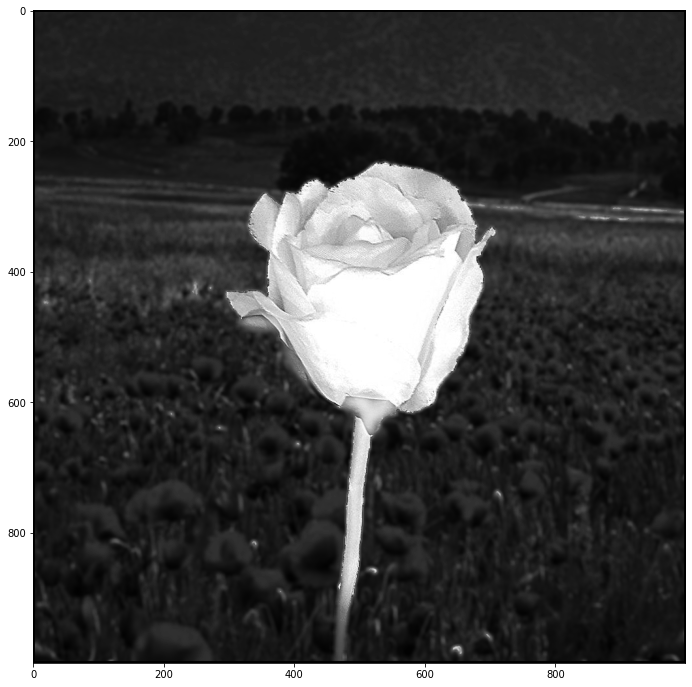

In [23]:
import cv2, argparse
import numpy as np
import matplotlib.pyplot as plt

my_parser = argparse.ArgumentParser()
my_parser.add_argument('--image')
my_parser.add_argument('--size', default=7, type=int)
my_parser.add_argument('--amount', default=1/49, type=int)
args = my_parser.parse_args()

image = cv2.imread(args.image, cv2.IMREAD_GRAYSCALE)
result = np.zeros(image.shape)
fig = plt.figure(figsize=(12, 12))
rows, cols = image.shape

def convolution(size, amount):
  mask = np.ones(size)* amount
  for i in range((size//2), rows - (size//2)):
    for j in range((size//2), cols - (size//2)):
      small_image = image[i-(size//2):i+(size//2 + 1), j-(size//2):j+(size//2 + 1)]
      temp = np.multiply(small_image, mask)
      out = np.sum(temp)
      if out < 100:
        result[i, j] = out
      else:
        result[i, j] = image[i, j]

  return result

result = convolution(args.size, args.amount)

plt.imshow(result, cmap='gray')
cv2.waitKey(0)

-1

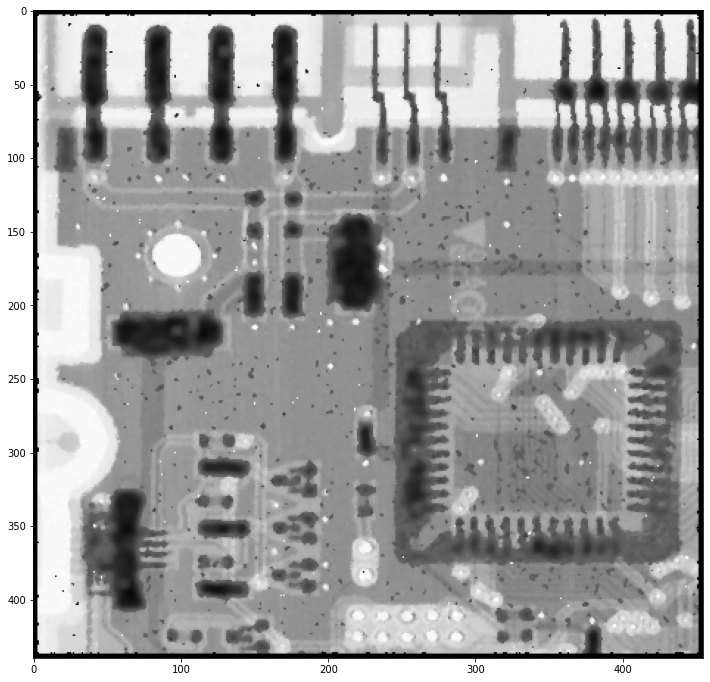

In [50]:
import cv2, argparse
import matplotlib.pyplot as plt

my_parser = argparse.ArgumentParser()
my_parser.add_argument('--image')
args = my_parser.parse_args()
fig = plt.figure(figsize=(12, 12))

image = cv2.imread(args.image, cv2.IMREAD_GRAYSCALE)

image = cv2.medianBlur(image, 3)
plt.imshow(image, cmap='gray')
cv2.waitKey(0)